In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv('../Data/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [106]:
df.shape

(918, 12)

In [107]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [108]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [109]:
Q1_restingbp = df.RestingBP.quantile(0.25)
Q3_restingbp = df.RestingBP.quantile(0.75)
IQR_restingbp = Q3_restingbp - Q1_restingbp
lb_restingbp, ub_restingbp = Q1_restingbp - 1.5*IQR_restingbp, Q3_restingbp + 1.5*IQR_restingbp 

Q1_cholesterol = df.Cholesterol.quantile(0.25)
Q3_cholesterol = df.Cholesterol.quantile(0.75)
IQR_cholesterol = Q3_cholesterol - Q1_cholesterol
lb_cholesterol, ub_cholesterol = Q1_cholesterol - 1.5*IQR_cholesterol, Q3_cholesterol + 1.5*IQR_cholesterol 


In [110]:
df_cleaned = df[(df.RestingBP > lb_restingbp) & (df.RestingBP < ub_restingbp) & (df.Cholesterol > lb_cholesterol) & (df.Cholesterol < ub_cholesterol)]
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [111]:
df_cleaned.shape, df.shape

((703, 12), (918, 12))

In [112]:
df_cleaned.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,52.725462,131.034139,239.940256,0.159317,140.577525,0.885491,0.467994
std,9.493889,14.712205,50.767661,0.366232,24.355146,1.062218,0.499330
min,28.000000,92.000000,85.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.500000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,273.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,165.000000,407.000000,1.000000,202.000000,6.200000,1.000000


(array([  3.,   2.,  14.,   9.,  53.,  14.,   8., 118.,  24.,  39., 119.,
         25.,  36., 110.,  22.,  49.,   7.,   6.,  43.,   2.]),
 array([ 92.  ,  95.65,  99.3 , 102.95, 106.6 , 110.25, 113.9 , 117.55,
        121.2 , 124.85, 128.5 , 132.15, 135.8 , 139.45, 143.1 , 146.75,
        150.4 , 154.05, 157.7 , 161.35, 165.  ]),
 <BarContainer object of 20 artists>)

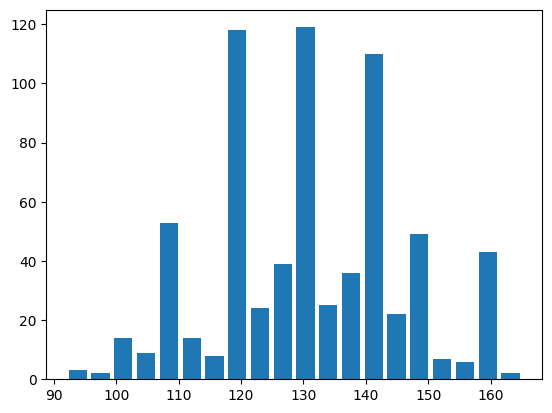

In [113]:
plt.hist(df_cleaned.RestingBP, bins=20, rwidth=0.8)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  11.,  41.,
        107., 214., 216., 155.,  79.,  53.,  20.,  13.,   7.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <BarContainer object of 20 artists>)

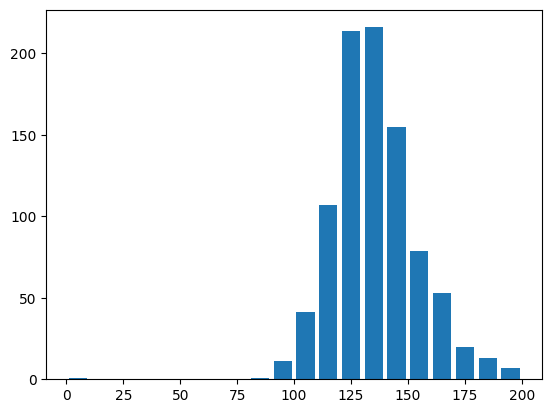

In [114]:
plt.hist(df.RestingBP, bins=20, rwidth=0.8)

(array([  3.,   6.,   4.,  14.,  18.,  44.,  36.,  77.,  91., 101.,  71.,
        104.,  87.,  61.,  75.,  57.,  42.,  19.,   6.,   2.]),
 array([ 60. ,  67.1,  74.2,  81.3,  88.4,  95.5, 102.6, 109.7, 116.8,
        123.9, 131. , 138.1, 145.2, 152.3, 159.4, 166.5, 173.6, 180.7,
        187.8, 194.9, 202. ]),
 <BarContainer object of 20 artists>)

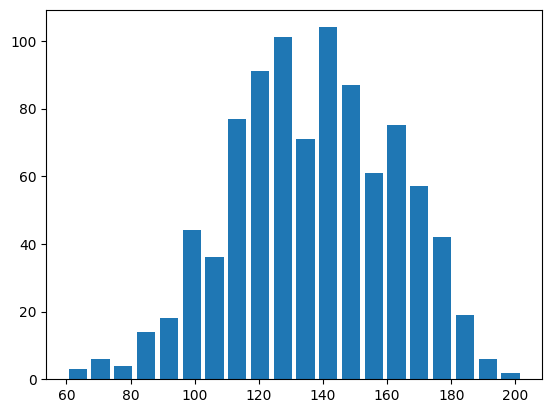

In [115]:
plt.hist(df.MaxHR, bins=20, rwidth=0.8)

(array([  5.,   7.,  20.,  17.,  44.,  42.,  61.,  43.,  77.,  71.,  84.,
        117.,  77.,  98.,  52.,  49.,  23.,  16.,   8.,   7.]),
 array([28.  , 30.45, 32.9 , 35.35, 37.8 , 40.25, 42.7 , 45.15, 47.6 ,
        50.05, 52.5 , 54.95, 57.4 , 59.85, 62.3 , 64.75, 67.2 , 69.65,
        72.1 , 74.55, 77.  ]),
 <BarContainer object of 20 artists>)

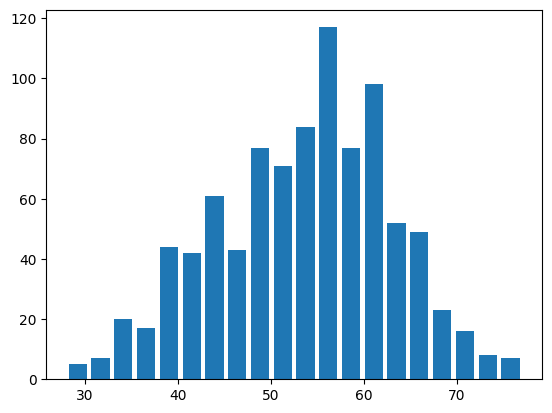

In [116]:
plt.hist(df.Age, bins=20, rwidth=0.8)

(array([  1.,   1.,   1.,   4.,   4., 370.,  58.,  60., 126., 110.,  90.,
         29.,  37.,   7.,   6.,  11.,   0.,   1.,   1.,   1.]),
 array([-2.6 , -2.16, -1.72, -1.28, -0.84, -0.4 ,  0.04,  0.48,  0.92,
         1.36,  1.8 ,  2.24,  2.68,  3.12,  3.56,  4.  ,  4.44,  4.88,
         5.32,  5.76,  6.2 ]),
 <BarContainer object of 20 artists>)

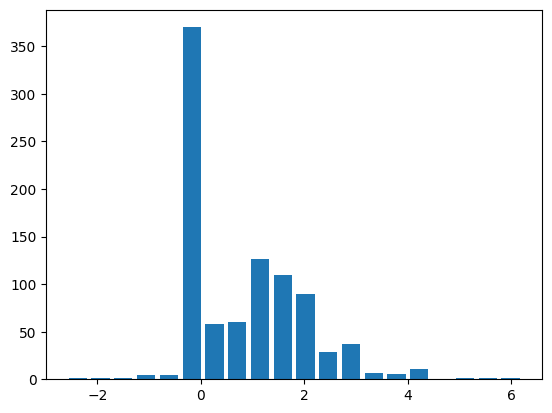

In [117]:
plt.hist(df.Oldpeak, bins=20, rwidth=0.8)

In [118]:
le = LabelEncoder()
col_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in col_to_encode:
    df[col] = le.fit_transform(df[col])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [119]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [120]:
X = df.drop(['HeartDisease'], axis=1)
y = df.HeartDisease

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [122]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.875


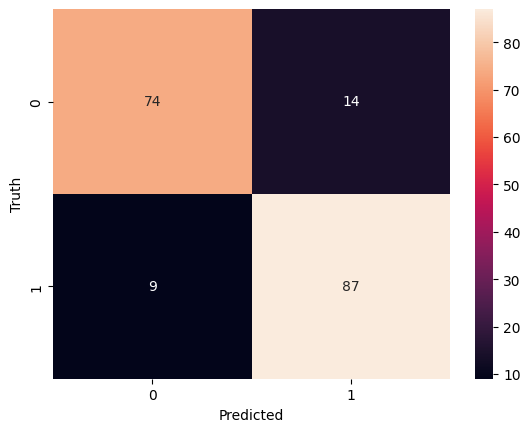

In [123]:
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred_svm)) 
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy: 0.8586956521739131


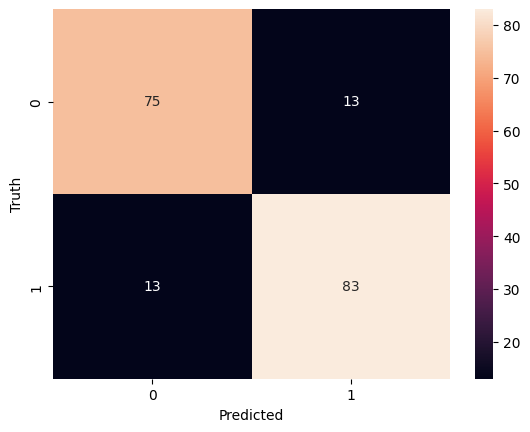

In [124]:
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)
y_pred_LR = model_LR.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred_LR)) 
sns.heatmap(confusion_matrix(y_test,y_pred_LR), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy: 0.8804347826086957


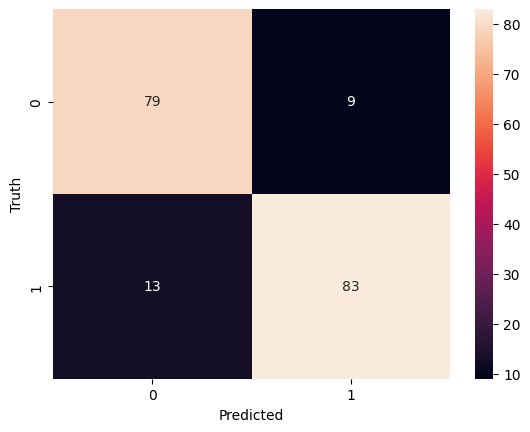

In [125]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred_rf)) 
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [140]:
pca = PCA(n_components=8) # or use the amount of variance to be captured - PCA(0.95) to capture 95% variance 
X_new = pca.fit_transform(X)
X_new.shape

(918, 8)

In [141]:
X.shape

(918, 11)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2) 

In [143]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.8097826086956522


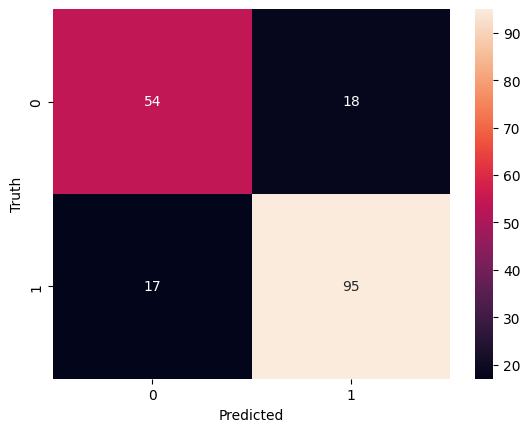

In [144]:
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred_svm)) 
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy: 0.8152173913043478


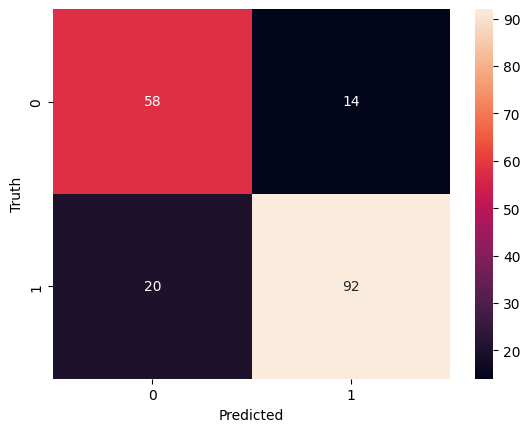

In [145]:
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)
y_pred_LR = model_LR.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred_LR)) 
sns.heatmap(confusion_matrix(y_test,y_pred_LR), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy: 0.8206521739130435


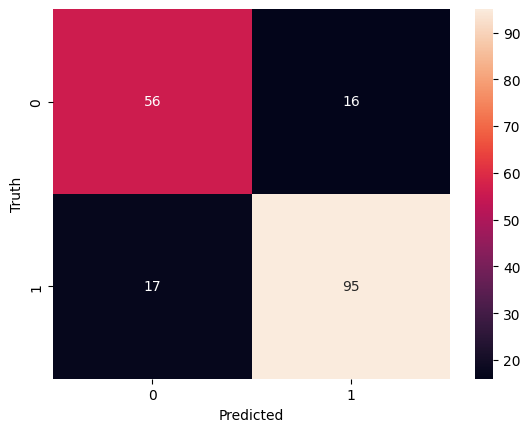

In [146]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred_rf)) 
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()